In [4]:
#Compressed Dataset file is stored at: https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

!wget https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

--2021-02-17 18:46:10--  https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7avu1oypedrerxl/Dataset.zip [following]
--2021-02-17 18:46:11--  https://www.dropbox.com/s/raw/7avu1oypedrerxl/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc86620ebe088e0fca26bfaa62af.dl.dropboxusercontent.com/cd/0/inline/BJJ8HK6PPJBYVkJmaiX4lGUPNKDIjsFb5P1VP7PxqGQakUhiQTomuE6qsz7SF8cowro4Eokps0Cr7MYKRMYsjL_sX3yYqEzWD0LI9Sa4J8apCsuzl81p4HLgH44G8JIetGI/file# [following]
--2021-02-17 18:46:11--  https://uc86620ebe088e0fca26bfaa62af.dl.dropboxusercontent.com/cd/0/inline/BJJ8HK6PPJBYVkJmaiX4lGUPNKDIjsFb5P1VP7PxqGQakUhiQTomuE6qsz7SF8cowro4Eokps0Cr7MYKRMYsjL_sX3yYqEzWD0LI9Sa4J8apC

In [5]:
!unzip /content/Dataset.zip?dl=0  #Extracting the compressed dataset

Archive:  /content/Dataset.zip?dl=0
   creating: Dataset/
   creating: Dataset/Test/
   creating: Dataset/Test/COVID/
  inflating: Dataset/Test/COVID/COVID (1001).png  
  inflating: Dataset/Test/COVID/COVID (1005).png  
  inflating: Dataset/Test/COVID/COVID (1012).png  
  inflating: Dataset/Test/COVID/COVID (1015).png  
  inflating: Dataset/Test/COVID/COVID (1019).png  
  inflating: Dataset/Test/COVID/COVID (1025).png  
  inflating: Dataset/Test/COVID/COVID (1027).png  
  inflating: Dataset/Test/COVID/COVID (1042).png  
  inflating: Dataset/Test/COVID/COVID (1043).png  
  inflating: Dataset/Test/COVID/COVID (1044).png  
  inflating: Dataset/Test/COVID/COVID (107).png  
  inflating: Dataset/Test/COVID/COVID (1073).png  
  inflating: Dataset/Test/COVID/COVID (1095).png  
  inflating: Dataset/Test/COVID/COVID (1099).png  
  inflating: Dataset/Test/COVID/COVID (113).png  
  inflating: Dataset/Test/COVID/COVID (1132).png  
  inflating: Dataset/Test/COVID/COVID (1143).png  
  inflating: Data

In [ ]:
# Installing Tensorflow 2.3 as it supports keras.preprocessing.image_dataset_from_directory function
!pip install tensorflow==2.3

     |████████████████████████████████| 320.4MB 52kB/s 
     |████████████████████████████████| 460kB 40.2MB/s 
     |████████████████████████████████| 20.1MB 94kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [1]:
!pip show tensorflow #Check which version of Tensorflow is present

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: google-pasta, six, keras-preprocessing, numpy, h5py, wheel, opt-einsum, tensorflow-estimator, protobuf, termcolor, scipy, absl-py, wrapt, tensorboard, gast, grpcio, astunparse
Required-by: fancyimpute


In [7]:
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import numpy as np

In [6]:
train_images_path = "Dataset/Train"
validation_images_path = "Dataset/Validation"
test_images_path = "Dataset/Test"

In [13]:
#Preprocessing the training and validation datasets
train_ds = image_dataset_from_directory(
    directory= train_images_path,
    labels='inferred',
    label_mode='int',
    batch_size=60,
    image_size=(256, 256)) #resized all images to 256x256
validation_ds = image_dataset_from_directory(
    directory= validation_images_path,
    labels='inferred',
    label_mode='int',
    batch_size=30,
    image_size=(256, 256))

Found 3108 files belonging to 3 classes.
Found 388 files belonging to 3 classes.


In [14]:
#CNN Based Model using Keras(Sequential Model)
#Multiple layers with different number of filters
#Layered architecture with 4 Convolutional Layers
model = Sequential()

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape =(256,256,3)
                 )) #224 is standard size, imagenet models are also trained on this size

model.add(Conv2D(64,
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) #to prevent overfitting

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(128,
                 kernel_size = (3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5)) #changed dropout value from 0.25 to 0.5 to further prevent overfitting

model.add(Dense(3,activation='sigmoid')) 
# output labels are [0,3), so 3 is used
#sigmoid function convert the data into probabilities for each class

#it is not binary crossentropy anymore so we sparse categorical crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #configure the learning process

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 64)       

In [ ]:
#Training data augmentation before feeding it to the CNN model
#train_datagen = image.ImageDataGenerator(
   # rescale = 1./255,
   # shear_range = 0.2,
   # zoom_range = 0.2,
   # horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    
#)

#train_generator= train_datagen.flow_from_directory(
    #train_images_path,
    #target_size = (224,224),
    #batch_size = 32,
   # class_mode = )

In [10]:
train_ds.class_names

['COVID', 'Normal', 'ViralPneumonia']

In [ ]:
#Validation data augmentation before feeding it to the CNN model

#validation_dataset = image.ImageDataGenerator(rescale=1./255)

#validation_generator = validation_dataset.flow_from_directory(
    #validation_images_path,
   # target_size = (256,256),
   # batch_size = 64,
    #class_mode = 'binary'

#)

In [11]:
validation_ds.class_names

['COVID', 'Normal', 'ViralPneumonia']

In [15]:
history = model.fit(
    train_ds,
    epochs = 10, 
    validation_data = validation_ds
    )

Epoch 1/10
52/52 [==============================] - 52s 856ms/step - loss: 252.2272 - accuracy: 0.3315 - val_loss: 1.0258 - val_accuracy: 0.3557
Epoch 2/10
52/52 [==============================] - 49s 837ms/step - loss: 0.8334 - accuracy: 0.6192 - val_loss: 0.5889 - val_accuracy: 0.7500
Epoch 3/10
52/52 [==============================] - 49s 837ms/step - loss: 0.5627 - accuracy: 0.7868 - val_loss: 0.4508 - val_accuracy: 0.8222
Epoch 4/10
52/52 [==============================] - 49s 830ms/step - loss: 0.4674 - accuracy: 0.8268 - val_loss: 0.2250 - val_accuracy: 0.9072
Epoch 5/10
52/52 [==============================] - 49s 831ms/step - loss: 0.3848 - accuracy: 0.8631 - val_loss: 0.1798 - val_accuracy: 0.9304
Epoch 6/10
52/52 [==============================] - 48s 828ms/step - loss: 0.4270 - accuracy: 0.8391 - val_loss: 0.1765 - val_accuracy: 0.9330
Epoch 7/10
52/52 [==============================] - 48s 828ms/step - loss: 0.3512 - accuracy: 0.8700 - val_loss: 0.1907 - val_accuracy: 0.92

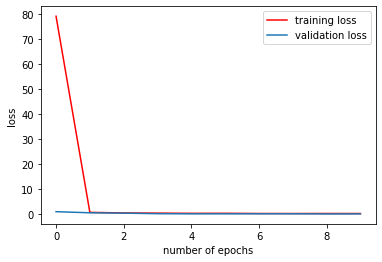

In [16]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

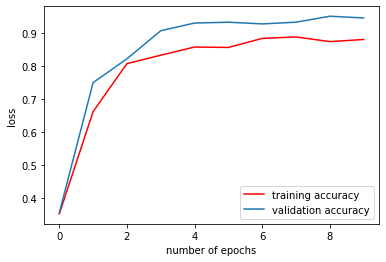

In [17]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()